# Monty Hall  Problem in Python 
## (With Jupyter Notebook)

This is personal, to get familiar with GitHub, Classes, Pandas and plotting in Python using Jupyter Notebook. This provide a simple test of exploration of the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem).

In [106]:
#First lets create the class contest wich will have:
# - The election door of the participant modelate in a list
# - The location of the prize behind the doors
# - The function "go" that will run the contest according the strategy of input

from random import randint

class Contest:
    def __init__(self,dqty,strategy):
        self.dqty = dqty 
        self.strategy = strategy
        self.participant = []
        self.prize = []
        for i in range(dqty):
            self.participant.append(0)
            self.prize.append(0)
    def go(self):
        participant = self.participant.copy()
        prize = self.prize.copy()
        if self.strategy == "Monty":
            participant[randint(0, self.dqty)-1] = 1 
            prize[randint(0, self.dqty-1)] = 1
            while participant.count(0)-1:
                for i in range(len(participant)):
                    if participant[i] == 0 and participant[i] == prize[i]:
                        participant[i] = 'x'
                        pos_init = participant.index(1)
                        pos_changed = participant.index(0)
                        participant[pos_init] = 0
                        participant[pos_changed] = 1
                        break

            if prize[participant.index(1)] == 1:
                return True
            elif prize[participant.index(1)] == 0:
                return False
        elif self.strategy == "None":
            participant[randint(0, self.dqty)-1] = 1 
            prize[randint(0, self.dqty-1)] = 1
            pos_selected = participant.index(1)
            if prize[pos_selected] == 1:
                return True
            elif prize[pos_selected] == 0:
                return False

In [86]:
class Result:
    def __init__(self):
        self.wins = [0]
        self.looses = [0]
    def add(self,value):
        if value:
            self.wins.append(self.wins[-1]+1)
            self.looses.append(self.looses[-1])
        else:
            self.wins.append(self.wins[-1])
            self.looses.append(self.looses[-1]+1)

In [94]:
contest = Contest(3,"Monty")
result = Result()

for i in range(10000):
    result.add(contest.go())

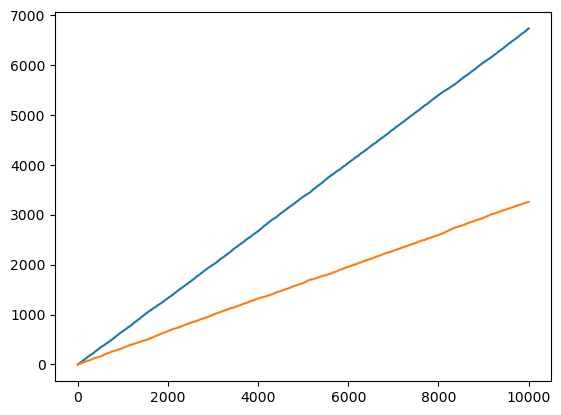

In [95]:
from matplotlib import pyplot as plt
plt.plot(result.wins)
plt.plot(result.looses)

plt.show()

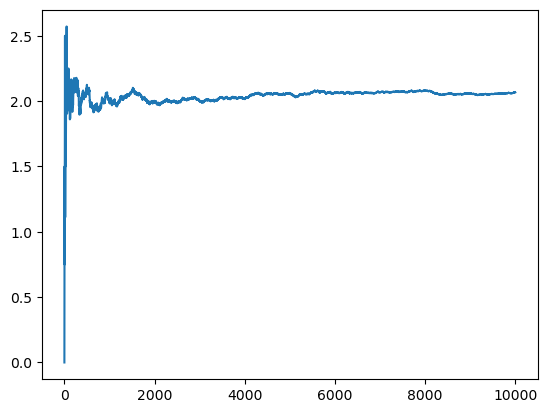

In [98]:
import pandas as pd

df = pd.DataFrame(list(zip(result.wins, result.looses)),
               columns =['wins', 'looses'])


plt.plot(df['wins']/df['looses'] )
plt.show()

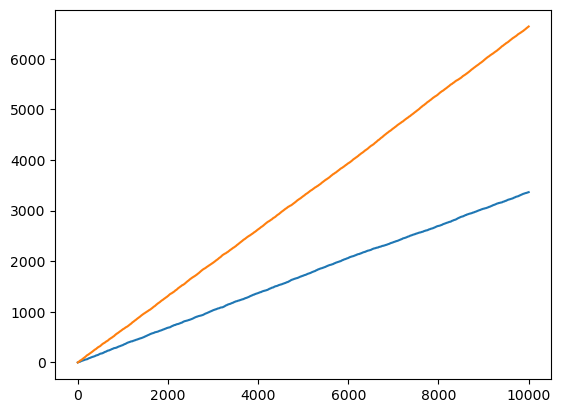

In [99]:
contest = Contest(3,"None")
result = Result()

for i in range(10000):
    result.add(contest.go())

plt.plot(result.wins)
plt.plot(result.looses)

plt.show()

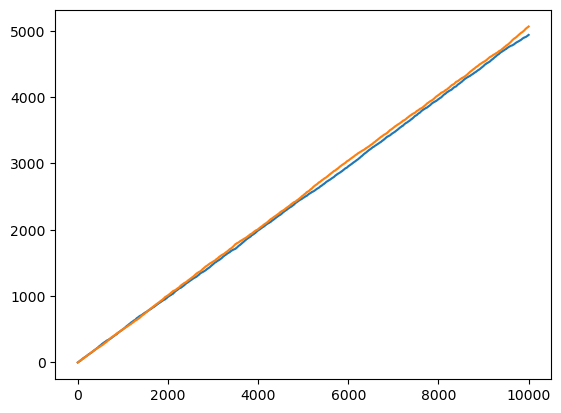

In [118]:
contest = Contest(4,"Monty")
result = Result()

for i in range(10000):
    result.add(contest.go())

plt.plot(result.wins)
plt.plot(result.looses)

plt.show()